In [7]:
import numpy as np
import json
import random
import math
from time import time
from typing import List, Tuple, Dict
import matplotlib.pyplot as plt

In [8]:
# Load Files
distance_matrix = np.load('distance_matrix.npy')
print(f"Distance matrix shape: {distance_matrix.shape}")

with open('locations_mapping.json', 'r') as f:
    locations_mapping = json.load(f)

print(f"Number of locations: {len(locations_mapping)}")


print("\nExample distance:", distance_matrix[0][1])
print("\nExample location data:", locations_mapping['0'])

Distance matrix shape: (201, 201)
Number of locations: 201

Example distance: 26649.0

Example location data: {'latitude': 33.6424, 'longitude': -117.8417, 'address': 'UCI Warehouse: 2006 McGaw Ave, Irvine, CA 92614'}


In [11]:
def calculate_route_distance(route, distance_matrix):
    """Calculate total distance of a route including return to warehouse"""
    total_distance = 0
    for i in range(len(route) - 1):
        total_distance += distance_matrix[route[i]][route[i + 1]]
    # Add distance back to warehouse (index 0)
    total_distance += distance_matrix[route[-1]][0]
    return total_distance

def plot_route(route, locations_mapping, distance_matrix, title="TSP Route"):
    """Plot the route on a scatter plot"""
    plt.figure(figsize=(12, 8))
    
    # Extract coordinates using longitude and latitude
    x_coords = [locations_mapping[str(i)]['longitude'] for i in route]
    y_coords = [locations_mapping[str(i)]['latitude'] for i in route]
    
    # Add warehouse return coordinates
    x_coords.append(locations_mapping['0']['longitude'])
    y_coords.append(locations_mapping['0']['latitude'])
    
    # Plot points and routes
    plt.scatter(x_coords, y_coords, c='blue', s=50)
    plt.plot(x_coords, y_coords, 'r-', alpha=0.5)
    
    # Highlight warehouse
    plt.scatter([x_coords[0]], [y_coords[0]], c='red', s=100, label='Warehouse')
    
    # Add title and total distance
    total_distance = calculate_route_distance(route, distance_matrix)
    plt.title(f"{title}\nTotal Distance: {total_distance:.2f}")
    
    plt.legend()
    plt.grid(True)
    plt.show()



Test route: [0, 4, 3, 1, 2]
Test route distance: 118005.0


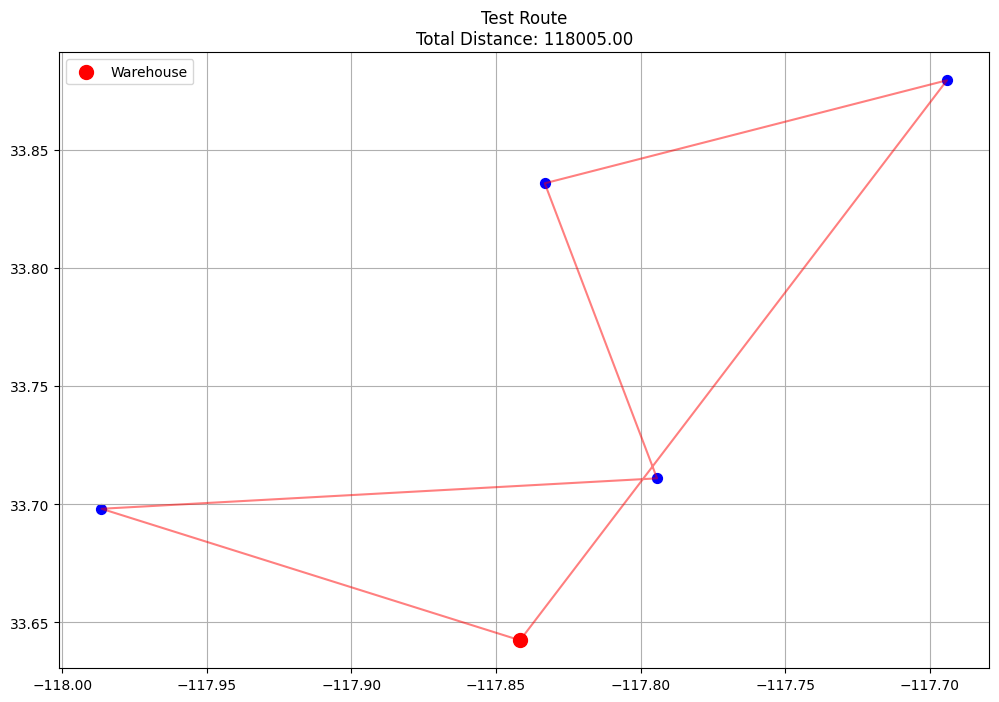

In [12]:
# Test the functions
test_route = [0] + random.sample(range(1, 5), 4)  # Small 5-location route
print("Test route:", test_route)
print("Test route distance:", calculate_route_distance(test_route, distance_matrix))
plot_route(test_route, locations_mapping, distance_matrix, "Test Route")

# Implement Algorithms

---

## Nearest Neighbor

In [ ]:

def nearest_neighbor():
    """Implement Nearest Neighbor algorithm"""
    # TODO: Implement Nearest Neighbor algorithm
    # 1. Start from warehouse (index 0)
    # 2. Each time, find the nearest unvisited location
    # 3. Add it to the route
    # 4. Repeat until all locations are visited
    # 5. Return the route
    pass

In [ ]:
# Testing nearest neighbor
try:
    start_time = time()
    nn_route = nearest_neighbor()
    end_time = time()
    
    print("\nNearest Neighbor Results:")
    print(f"Time taken: {end_time - start_time:.2f} seconds")
    print(f"Route length: {len(nn_route)}")
    print(f"Total distance: {calculate_route_distance(nn_route):.2f}")
    
    plot_route(nn_route, "Nearest Neighbor Route")
except:
    print("Error: Nearest Neighbor algorithm not implemented yet")


## Simulated Annealing

In [ ]:
def simulated_annealing(initial_temp=100.0, cooling_rate=0.995, iterations=10000):
    """Implement Simulated Annealing algorithm"""
    # TODO: Implement Simulated Annealing algorithm
    # 1. Generate initial random solution
    # 2. For each iteration:
    #    - Generate neighbor solution by swapping two cities
    #    - Calculate new distance
    #    - Accept if better
    #    - Accept with probability if worse
    #    - Update temperature
    # 3. Return best route found
    pass


In [ ]:

# Test Simulated Annealing
try:
    start_time = time()
    sa_route = simulated_annealing()
    end_time = time()
    
    print("\nSimulated Annealing Results:")
    print(f"Time taken: {end_time - start_time:.2f} seconds")
    print(f"Route length: {len(sa_route)}")
    print(f"Total distance: {calculate_route_distance(sa_route):.2f}")
    
    plot_route(sa_route, "Simulated Annealing Route")
except:
    print("Error: Simulated Annealing algorithm not implemented yet")


## Random Search (Base case)

In [ ]:
# Change it to 10000 later
def random_search(n_samples=100):
    """Implement Random Search algorithm"""
    best_route = None
    best_distance = float('inf')  # Initialize with infinity
    
    # Get number of locations (excluding warehouse)
    n_locations = len(distance_matrix)
    
    for _ in range(n_samples):
        # Generate random route (keeping warehouse as start)
        current_route = [0] + random.sample(range(1, n_locations), n_locations-1)
        
        # Calculate total distance
        current_distance = calculate_route_distance(current_route, distance_matrix)
        
        # Update best route if current route is better
        if current_distance < best_distance:
            best_distance = current_distance
            best_route = current_route
    
    return best_route




Random Search Results:
Time taken: 0.01 seconds
Route length: 201
Total distance: 5339134.00


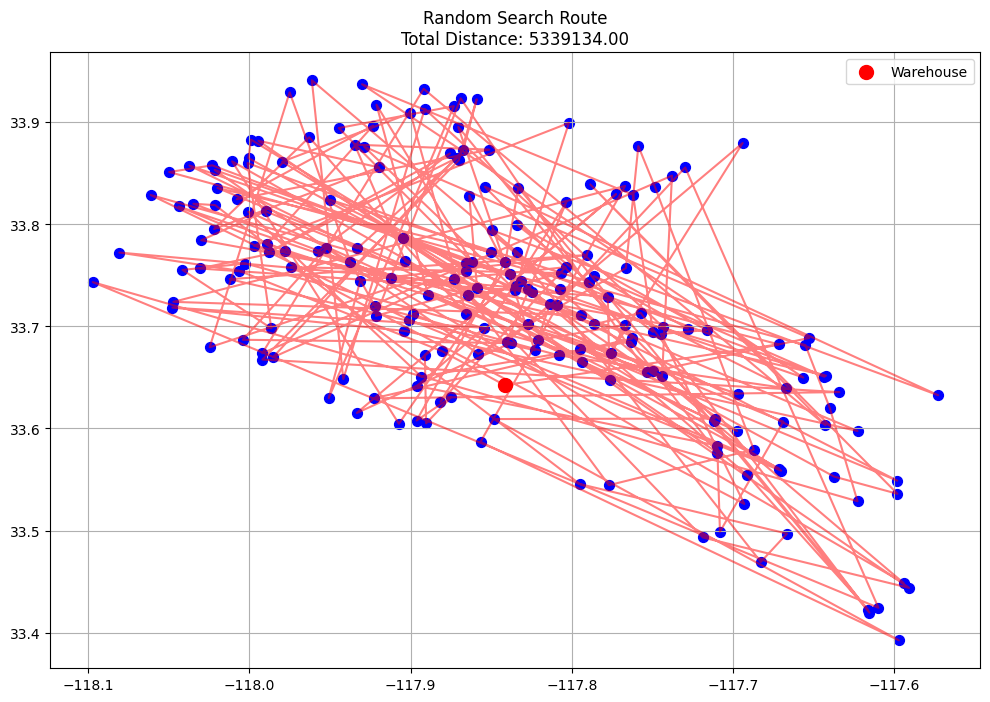

In [14]:
# Test Random Search
try:
    start_time = time()
    random_route = random_search()
    end_time = time()
    
    print("\nRandom Search Results:")
    print(f"Time taken: {end_time - start_time:.2f} seconds")
    print(f"Route length: {len(random_route)}")
    print(f"Total distance: {calculate_route_distance(random_route, distance_matrix):.2f}")
    
    plot_route(random_route, locations_mapping, distance_matrix, "Random Search Route")
except Exception as e:
    print(f"Error in Random Search: {str(e)}")

### Maybe add solution case for google map tsp solution api as a metric?

---


In [ ]:
# Only run this after implementing all algorithms
def compare_all_results():
    print("\nComparing All Algorithms:")
    
    try:
        # Run Nearest Neighbor
        start_time = time()
        nn_route = nearest_neighbor()
        nn_time = time() - start_time
        nn_distance = calculate_route_distance(nn_route)
        print(f"\nNearest Neighbor:")
        print(f"Distance: {nn_distance:.2f}")
        print(f"Time: {nn_time:.2f} seconds")
        plot_route(nn_route, "Nearest Neighbor Route")
    except:
        print("Nearest Neighbor not implemented")
    
    try:
        # Run Simulated Annealing
        start_time = time()
        sa_route = simulated_annealing()
        sa_time = time() - start_time
        sa_distance = calculate_route_distance(sa_route)
        print(f"\nSimulated Annealing:")
        print(f"Distance: {sa_distance:.2f}")
        print(f"Time: {sa_time:.2f} seconds")
        plot_route(sa_route, "Simulated Annealing Route")
    except:
        print("Simulated Annealing not implemented")
    
    try:
        # Run Random Search
        start_time = time()
        random_route = random_search()
        random_time = time() - start_time
        random_distance = calculate_route_distance(random_route)
        print(f"\nRandom Search:")
        print(f"Distance: {random_distance:.2f}")
        print(f"Time: {random_time:.2f} seconds")
        plot_route(random_route, "Random Search Route")
    except:
        print("Random Search not implemented")

# Uncomment to run comparison after implementing all algorithms
# compare_all_results()